# Data Split

In [ ]:
# Setup
import numpy as np
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

PROJECT_ROOT = ".." 
DIRS = {
    'data':    os.path.join(PROJECT_ROOT, 'outputs', 'data'),
    'models':  os.path.join(PROJECT_ROOT, 'outputs', 'models'),
    'figures': os.path.join(PROJECT_ROOT, 'outputs', 'figures'),
    'results': os.path.join(PROJECT_ROOT, 'outputs', 'results')
}

In [9]:
X = np.load(f"{DIRS['data']}/X_raw.npy")
y = np.load(f"{DIRS['data']}/y_raw.npy")

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

splits = {
    'X_train': X_train_scaled, 'y_train':y_train,
    'X_val': X_val_scaled, 'y_val': y_val,
    'X_test': X_test_scaled, 'y_test': y_test
}

for name, data in splits.items():
    np.save(f"{DIRS['data']}/{name}.npy", data)

joblib.dump(scaler, f"{DIRS['models']}/scaler.pkl")


['..\\outputs\\models/scaler.pkl']

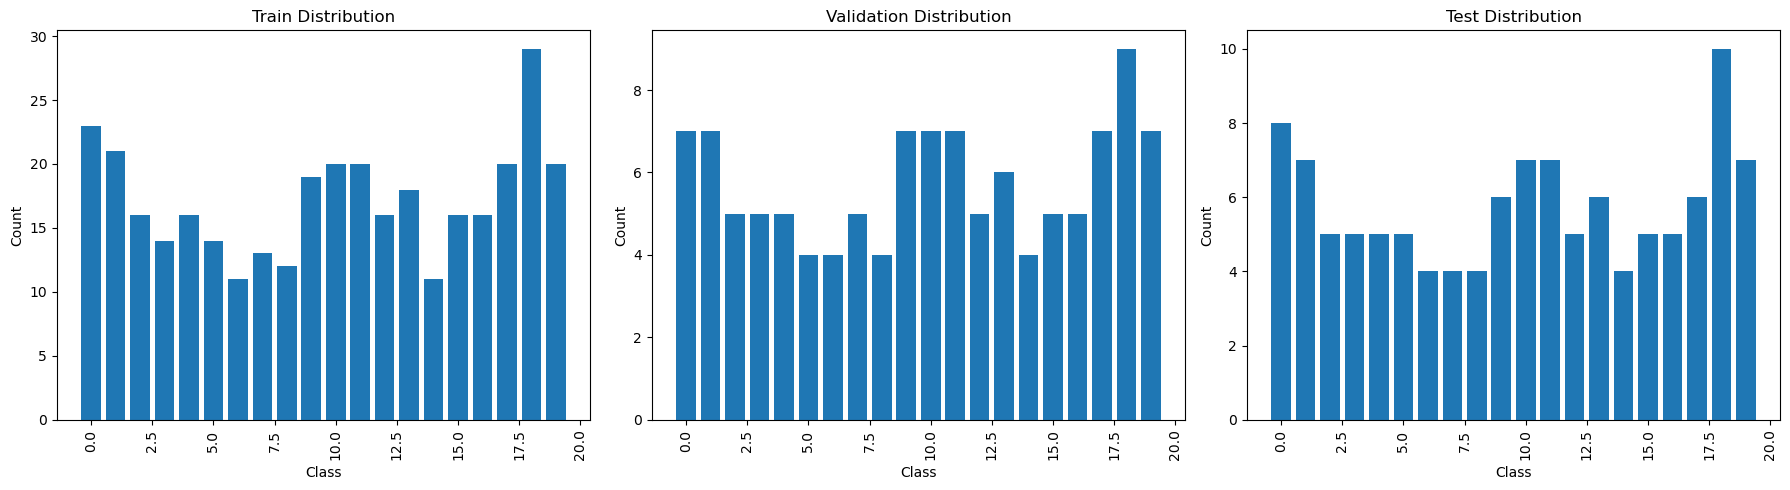

In [ ]:
plt.figure(figsize=(18, 5))  

def count_dist(labels):
    uniq, counts = np.unique(labels, return_counts=True)
    return dict(zip(uniq, counts))

dist_train = count_dist(y_train)
dist_val   = count_dist(y_val)
dist_test  = count_dist(y_test)

classes = sorted(np.unique(y))

train_counts = [dist_train.get(c,0) for c in classes]
val_counts   = [dist_val.get(c,0) for c in classes]
test_counts  = [dist_test.get(c,0) for c in classes]

plt.subplot(1, 3, 1)  
plt.bar(classes, train_counts)
plt.title("Train Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.subplot(1, 3, 2) 
plt.bar(classes, val_counts)
plt.title("Validation Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.subplot(1, 3, 3) 
plt.bar(classes, test_counts)
plt.title("Test Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.tight_layout()

plt.savefig(f"{DIRS['figures']}/02_class_distribution.png", dpi=300, bbox_inches='tight')
plt.show()